## DA Final project:
# Nobel Prize Winners: 1901 to 2023
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>

## Group Number: 36

### Presented by:
* Sarah Bonnan
* Haim Amzallag
* Guy Hasson





## Summary
### 1. Reading & Meeting with Data
#### 1.1. Reading data
#### 1.2. Wrangling data
### 2. Analyse of the distribution of Nobel Prizes
#### 2.1. Analyse by Country
#### 2.2. Analyse by Category
#### 2.3. Analyse by Gender
#### 2.4. Average Age of Winners by Category

## 1. Reading & Meeting with Data :

<p>The 'Nobel Prize Winners: 1901 to 2023' Dataset contains various details about Nobel Prize laureates. 
<p>It includes details such as the Category of the Nobel Prize, the Year in which the Nobel Prize was awarded, the Share of the prize received by the laureate, the Full name, the Gender of the laureates</p>
 
<br>Source:  [Kaggle](https://www.kaggle.com/datasets/sazidthe1/nobel-prize-data)

The primary dataset was retrieved from the Nobel Foundation's Nobel Prize Data. 

In [1]:
#!pip install geopandas
#!pip install folium
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image
from matplotlib.patches import Patch
import matplotlib.patches as mpatches


### 1.1. Reading data

In [2]:
url = 'https://raw.githubusercontent.com/SarahB21/Project2024/main/nobel_laureates_data.csv'
df = pd.read_csv(url)
nobel_data=df.copy()

In [3]:
# nobel_data.info()
nobel_data.shape

(1000, 16)

In [4]:
nobel_data.head(5)

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY


### 1.2. Wrangling data

In [5]:
category_unique = nobel_data['category'].unique()
print(category_unique)


['medicine' 'economics' 'peace' 'literature' 'chemistry' 'physics']


In [6]:
nobel_data.drop_duplicates(subset=['year', 'category', 'motivation', 'prizeShare', 'laureateID',
       'fullName', 'gender', 'born', 'bornCountry', 'bornCity', 'died',
       'diedCountry', 'diedCity', 'organizationName', 'organizationCountry',
       'organizationCity'], inplace=True)
nobel_data.shape

(1000, 16)

In [7]:
nobel_data.rename(columns=lambda x: x.capitalize(), inplace=True)

In [8]:
nobel_data.head(2)

,Year,Category,Motivation,Prizeshare,Laureateid,Fullname,Gender,Born,Borncountry,Borncity,Died,Diedcountry,Diedcity,Organizationname,Organizationcountry,Organizationcity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA


In [9]:
nobel_data.columns

Index(['Year', 'Category', 'Motivation', 'Prizeshare', 'Laureateid',
       'Fullname', 'Gender', 'Born', 'Borncountry', 'Borncity', 'Died',
       'Diedcountry', 'Diedcity', 'Organizationname', 'Organizationcountry',
       'Organizationcity'],
      dtype='object')

In [10]:
nobel_data.isnull().sum().to_frame('nulls')

,nulls
Year,0
Category,0
Motivation,0
Prizeshare,0
Laureateid,0
Fullname,0
Gender,0
Born,0
Borncountry,30
Borncity,34


In [11]:
nobel_data['Died'].fillna('UNREPORTED', inplace=True)
nobel_data['Borncountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Borncity'].fillna('UNREPORTED', inplace=True)
nobel_data['Diedcountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Diedcity'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationname'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationcountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationcity'].fillna('UNREPORTED', inplace=True)
 
nobel_data.dtypes

Year                    int64
Category               object
Motivation             object
Prizeshare              int64
Laureateid              int64
Fullname               object
Gender                 object
Born                   object
Borncountry            object
Borncity               object
Died                   object
Diedcountry            object
Diedcity               object
Organizationname       object
Organizationcountry    object
Organizationcity       object
dtype: object

## 2. Distribution analyse of Nobel Prizes
### 2.1. Analyse by country

In [12]:
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')

In [13]:
world.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


#### We need to joins `nobel_data` and `world` DataFrames based on country of birth and country names, identifies unmatched countries in each dataset, and prints their names to ensure data consistency.

In [14]:
# Join between the two DataFrames
merged_data = pd.merge(left=nobel_data, right=world, left_on='Borncountry', right_on='ADMIN', how='left')

# Select entries without a match in 'Borncountry'.
missing_borncountry = merged_data[merged_data['Borncountry'].isnull()]
missing_borncountry_names = missing_borncountry['ADMIN'].unique()

# Select entries without a match in 'ADMIN'.
missing_admin = merged_data[merged_data['ADMIN'].isnull()]
missing_admin_names = missing_admin['Borncountry'].unique()

#  Display the names of the countries without a match.
print("Countries in 'ADMIN' of World without a match in 'Borncountry' de nobel_data:")
print(missing_borncountry_names)

print("\nCountries in'Borncountry' of filtered_data without a match in 'ADMIN' of World:")
print(missing_admin_names)


Countries in 'ADMIN' of World without a match in 'Borncountry' de nobel_data:
[]

Countries in'Borncountry' of filtered_data without a match in 'ADMIN' of World:
['USA' 'UNREPORTED' 'the Netherlands' 'Tanzania' 'Scotland'
 'Czech Republic' 'Northern Ireland' 'Saint Lucia' 'Turkiye'
 'Guadeloupe Island' 'Faroe Islands (Denmark)']


#### This code replaces certain country names in the 'Borncountry' column of the 'nobel_data' DataFrame with standardized country names.

In [15]:
replacement = {'USA':'United States of America','the Netherlands':'Netherlands','Tanzania':'United Republic of Tanzania','Scotland':'United Kingdom','Northern Ireland':'Saint Lucia',
                'Czech Republic':'Czechia','Turkiye':'Turkey','Guadeloupe Island':'France','Faroe Islands (Denmark)':'Denmark', 'UNREPORTED':'Organization'}

# Perform replacement in the 'Borncountry' column of the 'nobel_data' DataFrame."
nobel_data['Borncountry'].replace(replacement, inplace=True)


#### Show nobel countries with at least one nobel laureate on a map with naturalearth_lowres

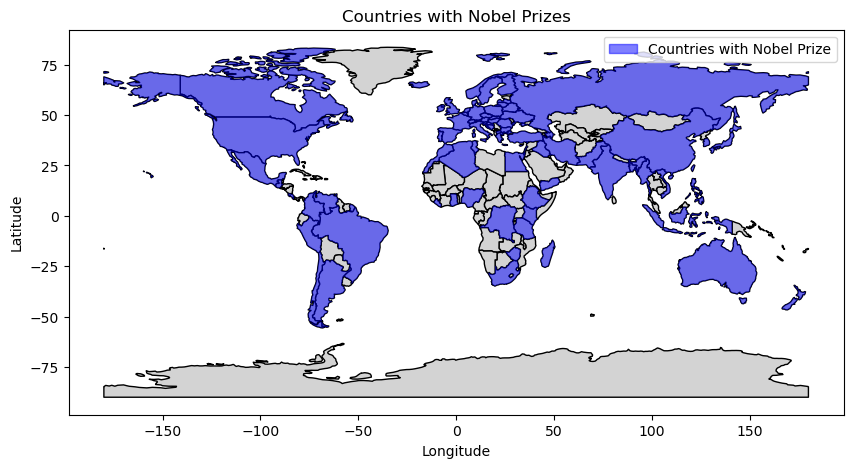

In [16]:
# Get the list of countries from the 'Borncountry' column.
born_countries = nobel_data['Borncountry'].unique()
nobel_countries = set(born_countries) 

# Merge the Nobel Prize data with the geospatial data of countries.
nobel_world = world[world['ADMIN'].isin(nobel_countries)]

# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
nobel_world.plot(ax=ax, color='blue', alpha=0.5)

# Create a custom legend
blue_patch = mpatches.Patch(color='blue', alpha=0.5, label='Countries with Nobel Prize')
ax.legend(handles=[blue_patch])

plt.title('Countries with Nobel Prizes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


We can observe that mainland Africa has the fewest Nobel Prizes, indicating lower education levels and typically, a weaker economy in that region."

In [17]:
# Get the country that has received the highest number of Nobel Prizes
nobel_data[~nobel_data["Prizeshare"].isnull()][["Borncountry"]].value_counts().head(5)

Borncountry             
United States of America    292
United Kingdom              101
Germany                      84
France                       62
Organization                 30
Name: count, dtype: int64

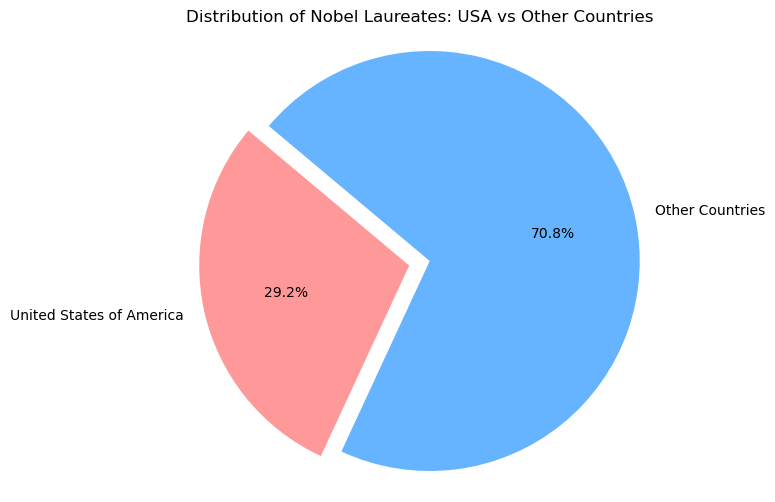

In [18]:
# Count the number of Nobel laureates from USA
usa_laureates_count = nobel_data[nobel_data['Borncountry'] == 'United States of America'].shape[0]

# Count the number of Nobel laureates from other countries
other_countries_laureates_count = nobel_data[nobel_data['Borncountry'] != 'United States of America'].shape[0]

# Create data for the pie chart
labels = ['United States of America', 'Other Countries']
sizes = [usa_laureates_count, other_countries_laureates_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (USA)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Nobel Laureates: USA vs Other Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


For analyse by category, we're excluding the USA from our analysis to better understand the global distribution of Nobel Prizes, as the USA historically has a large share of laureates.

### 2.3. Analyse by category

#### We want to check if there are countries that are particularly talented in a category and win many Nobel Prize in that same category.

## Heatmap by number of Nobel Laureates born in each country

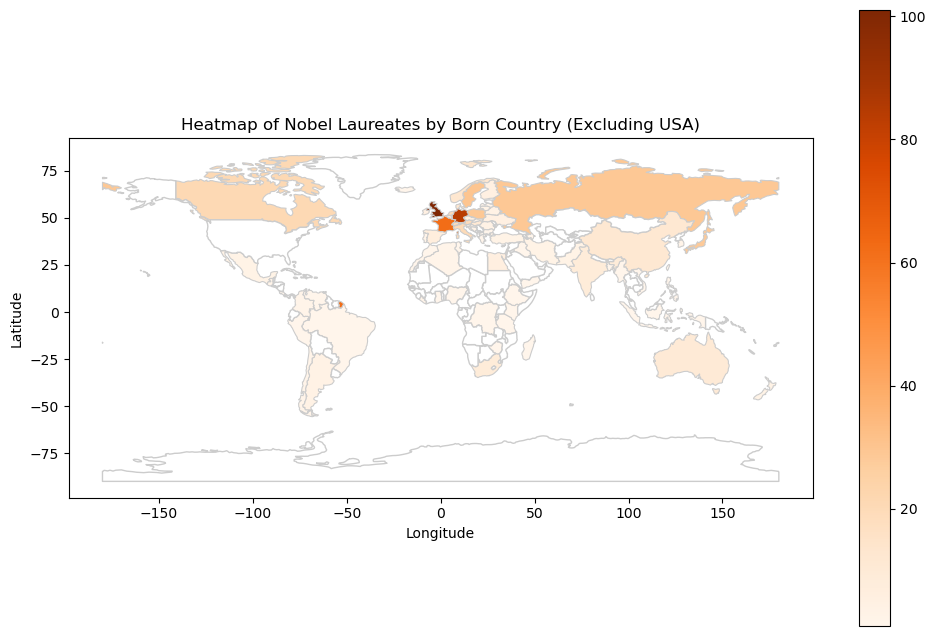

In [19]:
# Count the number of Nobel Laureates born in each country
born_country_counts = nobel_data['Borncountry'].value_counts().reset_index()
born_country_counts.columns = ['ADMIN', 'Count']  # Rename columns for merging

# Exclude USA from the list of born countries using .loc and !=
born_country_counts_excluding_usa = born_country_counts.loc[born_country_counts['ADMIN'] != 'United States of America']

# Merge the Nobel Laureates data with the geospatial data of countries excluding USA
world_with_counts_excluding_usa = world.merge(born_country_counts_excluding_usa, on='ADMIN', how='left')

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Plot countries with Nobel Laureates excluding USA
world_with_counts_excluding_usa.plot(column='Count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot countries with no Nobel Laureates in white
world_with_counts_excluding_usa[world_with_counts_excluding_usa['Count'].isna()].plot(ax=ax, color='white', edgecolor='0.8')

# Add title and labels
plt.title('Heatmap of Nobel Laureates by Born Country (Excluding USA)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


### Distribution of Nobel Prizes by Category and Country (Excluding USA and Organizations)

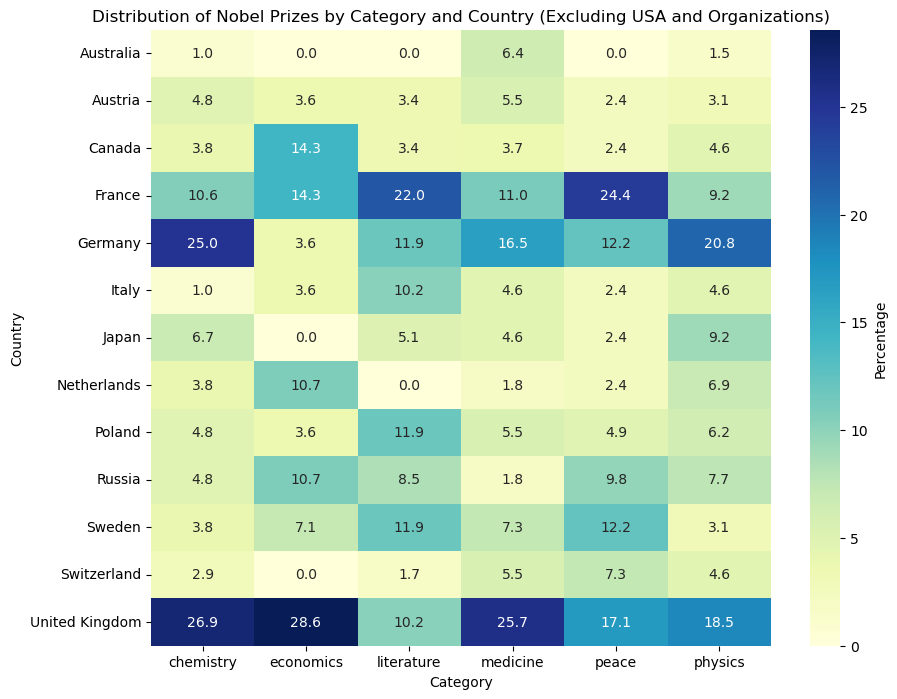

In [20]:
# Exclude data where 'Borncountry' is 'USA' or 'Organization'
filtered_data_excluding_usa_org = nobel_data[(nobel_data['Borncountry'] != 'United States of America') & (nobel_data['Borncountry'] != 'Organization')]

# Group the data by 'Borncountry' and 'Category' and count the occurrences
category_counts_excluding_usa_org = filtered_data_excluding_usa_org.groupby(['Borncountry', 'Category']).size().unstack(fill_value=0)

# Filter countries with less than 5 Nobel Prizes in any category
category_counts_filtered_excluding_usa_org = category_counts_excluding_usa_org[category_counts_excluding_usa_org.max(axis=1) > 5]

# Calculate the percentages
category_percentages_excluding_usa_org = category_counts_filtered_excluding_usa_org.div(category_counts_filtered_excluding_usa_org.sum(axis=0), axis=1) * 100

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(category_percentages_excluding_usa_org, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})

plt.xlabel('Category')
plt.ylabel('Country')
plt.title('Distribution of Nobel Prizes by Category and Country (Excluding USA and Organizations)')
plt.show()


#### Conclusions :
1. Most countries receiving Nobel Prizes are from the Western world, highlighting their civilization.

2. The top three countries across all fields are the UK, Germany and France.

### 2.3 Gender distribution of Nobel Prizes

In [21]:
nobel_data['Gender'].unique()

array(['female', 'male', 'org'], dtype=object)

In [22]:
count_org = nobel_data['Gender'].str.count('org').sum()
print("Number of rows with 'Gender' as 'org':", count_org)

Number of rows with 'Gender' as 'org': 30


#### Let's check gender distribution of Nobel Prizes 

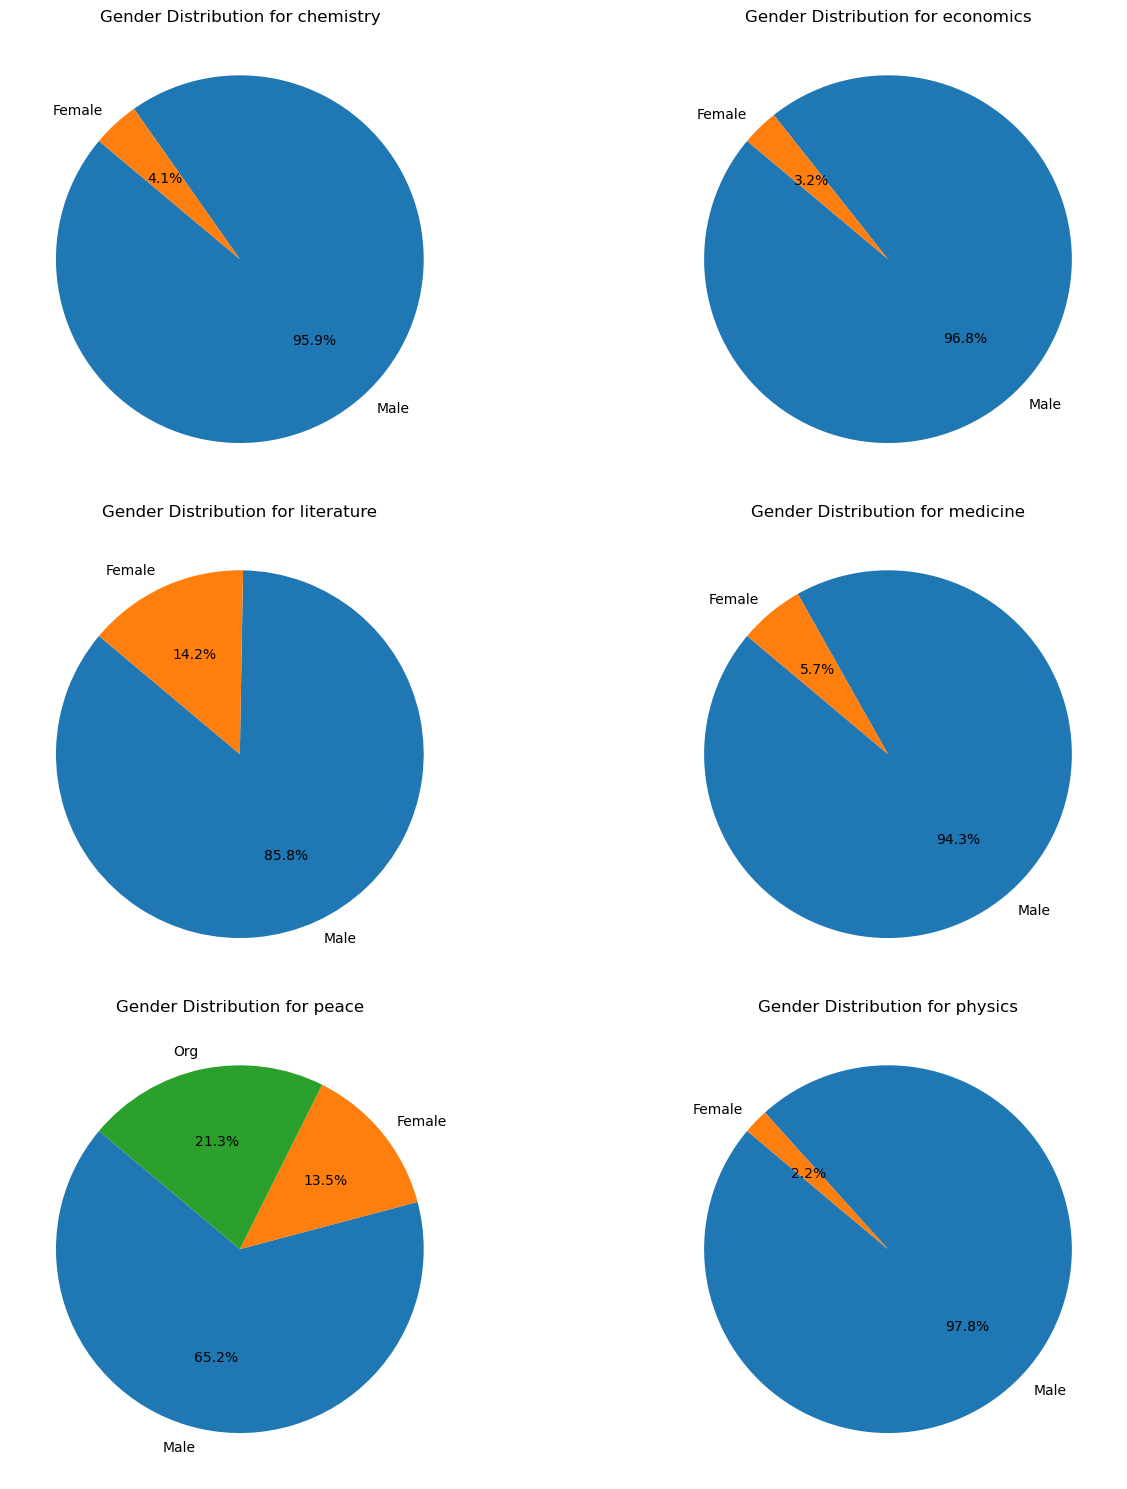

In [23]:
# Sample gender percentages data (replace with your actual data)
gender_percentages = nobel_data.groupby(['Category', 'Gender']).size().unstack(fill_value=0)
gender_percentages['Total'] = gender_percentages.sum(axis=1)
gender_percentages['Male Percentage'] = gender_percentages['male'] / gender_percentages['Total'] * 100
gender_percentages['Female Percentage'] = gender_percentages['female'] / gender_percentages['Total'] * 100
gender_percentages['Organization Percentage'] = gender_percentages['org'] / gender_percentages['Total'] * 100

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Use of ChatGPT here
# Iterate over each category and plot
for i, (category, data) in enumerate(gender_percentages.iterrows()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    sizes = [data['Male Percentage'], data['Female Percentage'], data['Organization Percentage']]
    labels = ['Male', 'Female', 'Org']
    
    # Filter out slices with zero percentage
    sizes = [size for size in sizes if size > 0]
    labels = [label for size, label in zip(sizes, labels) if size > 0]

    if sizes:  # Check if sizes list is not empty
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'Gender Distribution for {category}')

plt.tight_layout()
plt.show()


#### Conclusions :
1. Men dominate the overall percentage of Nobel laureates, but is this trend consistent over time, or are there evolving trends?

2. Only the peace category shows an organization receiving a Nobel Prize.

#### Now we want to analyzes the percentage of male and female Nobel laureates by decade, starting from 1940 onwards. 


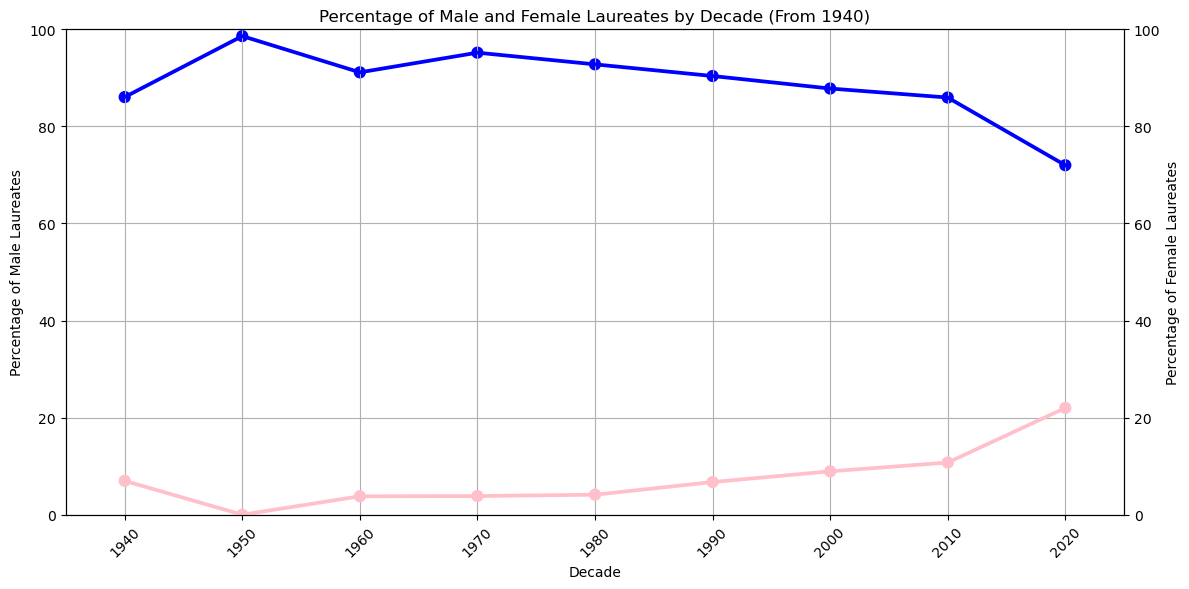

In [24]:
# Filter data for male and female laureates from 1940 onwards
nobel_data_1940 = nobel_data[nobel_data['Year'] > 1940]
male_laureates = nobel_data_1940[nobel_data_1940['Gender'] == 'male']
female_laureates = nobel_data_1940[nobel_data_1940['Gender'] == 'female']

# Group by decade and count the number of male and female laureates
male_counts_by_decade = male_laureates.groupby((male_laureates['Year'] // 10) * 10).size()
female_counts_by_decade = female_laureates.groupby((female_laureates['Year'] // 10) * 10).size()

# Calculate the total number of laureates per decade
total_counts_by_decade = nobel_data_1940.groupby((nobel_data_1940['Year'] // 10) * 10).size()

# Calculate the percentage of male and female laureates for each decade
male_percentage_by_decade = (male_counts_by_decade / total_counts_by_decade * 100).fillna(0).reset_index()
male_percentage_by_decade.columns = ['Decade', 'Male Percentage']
female_percentage_by_decade = (female_counts_by_decade / total_counts_by_decade * 100).fillna(0).reset_index()
female_percentage_by_decade.columns = ['Decade', 'Female Percentage']

# Plot using Seaborn's pointplot and twin axes
plt.figure(figsize=(12, 6))

# Plot male percentage
sns.pointplot(data=male_percentage_by_decade, x='Decade', y='Male Percentage', color='blue')
plt.title('Percentage of Male and Female Laureates by Decade (From 1940)')
plt.xlabel('Decade')
plt.ylabel('Percentage of Male Laureates')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.grid(True)
plt.xticks(rotation=45)

# Create second y-axis
plt.twinx()

# Plot female percentage
sns.pointplot(data=female_percentage_by_decade, x='Decade', y='Female Percentage', color='pink')
plt.ylabel('Percentage of Female Laureates')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100

plt.tight_layout()
plt.show()

## Conclusions:

1. Gender Progression: Women's representation in Nobel Prizes has notably improved over time, reflecting global strides towards gender equality. Conversely, there's been a gradual decline in male laureates, mirroring societal changes.

2. World Events Impact: The 1940-1950s saw a dip in female laureates, likely due to the upheaval of World War II, while male laureates surged, possibly due to wartime innovations.

3. Recent Trends: The last decade marked a peak for female laureates, echoing global efforts for gender parity. Meanwhile, male laureates declined from the 1970s, possibly influenced by advancing women's rights.

4. These insights highlight the evolving gender dynamics in Nobel Prize awards, shaped by historical events and societal progress.

<img src="https://www.nobelprize.org/uploads/2018/10/Nobel-women-laureates-2023-1024x683.jpg" alt="Nobel Women Laureates" width="500">


### 2.4. Average Age of Winners by Category

We want to check a connection between age and category

In [25]:
# Remove all entries in the 'Gender' column that contain 'org'.
nobel_data_filtered = nobel_data[~nobel_data['Gender'].str.contains('org')].copy()

# Use of ChatGPT to fix the dates
# Use a regular expression to extract the years.
nobel_data_filtered['Year of birth'] = nobel_data_filtered['Born'].str.extract(r'(\d{4})')

# Remove rows with missing or invalid years.
nobel_data_filtered = nobel_data_filtered[nobel_data_filtered['Year of birth'].notnull()]

# Convert the 'Year of birth' column to integers.
nobel_data_filtered['Year of birth'] = nobel_data_filtered['Year of birth'].astype(int)


In [26]:
nobel_data_filtered['Age'] = nobel_data_filtered['Year'] - nobel_data_filtered['Year of birth']
nobel_data_filtered['Age'].unique() # Check if all the ages are logic

array([68, 77, 51, 64, 78, 80, 62, 65, 61, 82, 75, 67, 69, 60, 56, 81, 53,
       58, 73, 90, 54, 66, 83, 72, 52, 55, 89, 71, 85, 47, 43, 97, 84, 63,
       74, 25, 59, 96, 76, 70, 17, 57, 50, 79, 32, 39, 42, 44, 36, 48, 87,
       88, 46, 40, 49, 33, 45, 37, 38, 41, 35, 34, 31, 86])

In [27]:
nobel_data_filtered.head(2)

,Year,Category,Motivation,Prizeshare,Laureateid,Fullname,Gender,Born,Borncountry,Borncity,Died,Diedcountry,Diedcity,Organizationname,Organizationcountry,Organizationcity,Year of birth,Age
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,UNREPORTED,UNREPORTED,Szeged University,Hungary,Szeged,1955,68
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,United States of America,New York NY,0000-00-00,UNREPORTED,UNREPORTED,Harvard University,USA,Cambridge MA,1946,77


/Users/sarahbonnan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


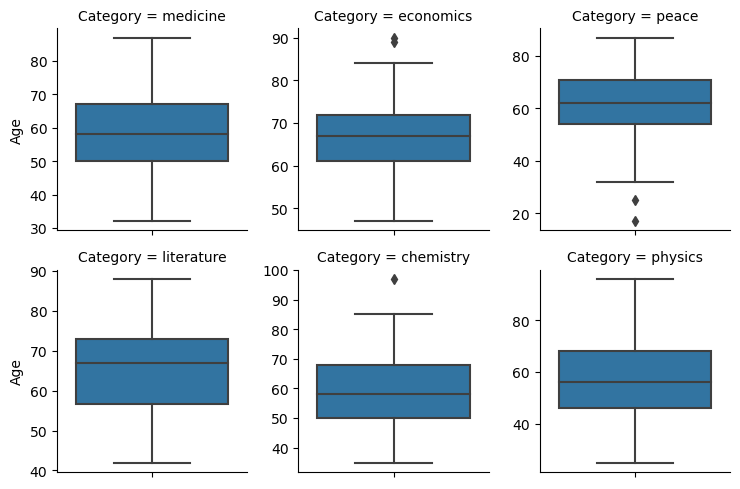

In [28]:
g = sns.FacetGrid(data = nobel_data_filtered, col="Category",  col_wrap= 3  ,sharex = False, sharey= False, height=2.5)
g.map_dataframe(sns.boxplot, y = 'Age')
plt.show()

### Average Age of Laureates by Decade

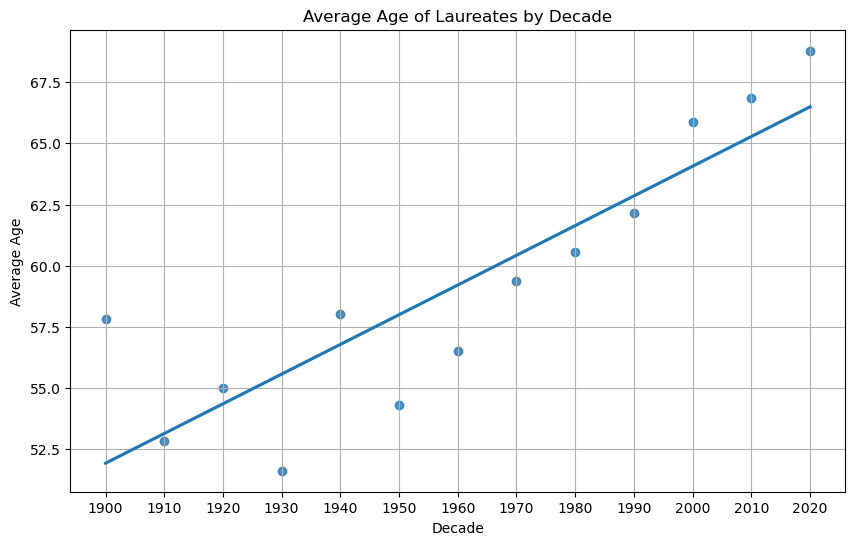

In [29]:
# Create a new column for decade
nobel_data_filtered['Decade'] = (nobel_data_filtered['Year'] // 10) * 10

# Group by decade and calculate average age
average_age_by_decade = nobel_data_filtered.groupby('Decade')['Age'].mean().reset_index()

# Set figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plot scatter plot of average age by decade with regression line
sns.regplot(x='Decade', y='Age', data=average_age_by_decade, scatter=True, ci=None, marker='o')

plt.title('Average Age of Laureates by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Age')
plt.grid(True)
plt.xticks(average_age_by_decade['Decade'])
plt.show()


In [30]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = average_age_by_decade['Decade'].corr(average_age_by_decade['Age'])
print("Pearson correlation coefficient:", correlation_coefficient)

Pearson correlation coefficient: 0.8688285716281036


## Conclusions - Average Age of Winners by Category

1. Across all categories, the average age is typically 50 or older, suggesting maturity and wisdom.
2. Surprisingly, there are instances in the Nobel Peace Prize category where individuals in their 20s have been recipients.
3.  We notice an increase of the average age laureats over the year: An interesting thing is that as the world advances in terms of technology, the average age of the Nobel laureates also increases - even though we could say that the technology belongs to the younger generation - the older generation is more significant in winning.
4. As the years progress, having strong academic backgrounds and qualifications becomes increasingly important for Nobel Prize recognition.
5. The data reveals a clear link between decades and laureates' average age. Over time, there's a noticeable rise in laureates' average age, as shown by the regression line. The positive Pearson correlation supports this trend, indicating a moderate relationship between decades and laureates' age.

## General conclusion 

In conclusion, examining Nobel Laureates data shows clear trends over time. Certain categories and countries consistently lead in receiving prizes. We also see changes, like more recognition for women and shifts in age patterns among winners. Overall, this analysis gives us valuable insights into how Nobel Prizes are awarded and what influences these decisions.